<a href="https://colab.research.google.com/github/DanielaNavaGarcia/Simulacion-I/blob/main/M%C3%A9todo_de_aceptaci%C3%B3n_y_rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

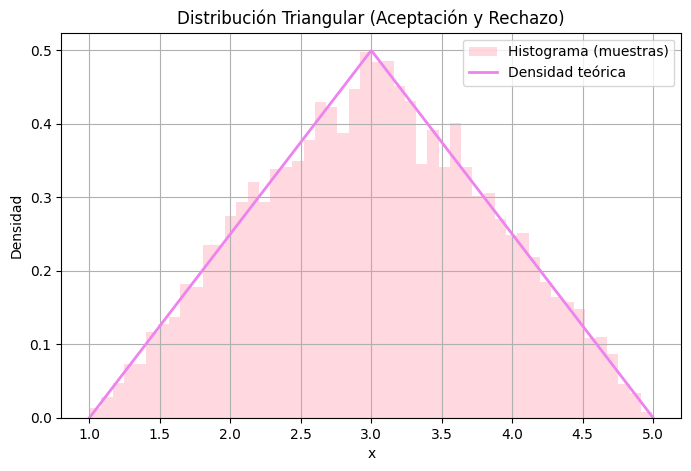

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la distribución triangular
a = 1
b = 3
c = 5

# Función de densidad triangular
def triangular_pdf(x, a, b, c):
    if a <= x < b:
        return 2 * (x - a) / ((b - a) * (c - a))
    elif b <= x <= c:
        return 2 * (c - x) / ((c - b) * (c - a))
    else:
        return 0

# Versión vectorizada para evaluación
vec_triangular_pdf = np.vectorize(lambda x: triangular_pdf(x, a, b, c))

# Método de Aceptación y Rechazo
def generate_triangular_ar(n_samples, a, b, c):
    samples = []
    M = 1.0  # cota superior de la densidad triangular (en su modo)

    while len(samples) < n_samples:
        x = np.random.uniform(a, c)
        y = np.random.uniform(0, M)
        if y <= triangular_pdf(x, a, b, c):
            samples.append(x)
    return np.array(samples)

# Generar muestras
np.random.seed(42)
samples = generate_triangular_ar(10000, a, b, c)

# Graficar
x = np.linspace(a, c, 500)
pdf = vec_triangular_pdf(x)

plt.figure(figsize=(8,5))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='pink', label='Histograma (muestras)')
plt.plot(x, pdf, 'violet', lw=2, label='Densidad teórica')
plt.title('Distribución Triangular (Aceptación y Rechazo)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()
